### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

plt.style.use('fivethirtyeight')

Importing plotly failed. Interactive plots will not work.


### Creating Functions

Creating several needed functions for the study : 
- get_stock_rates in order import stock exchange rates for a given company
- plotting functions to create linear plot of the stock price evolution 
- stock prediction functions

In [3]:
def get_stock_rates(company_name):
    """get the stock exchange rate for the given company from Yahoo! Finance for the studied period  
    i.e. from 2010-01-01 to 2020-03-08
    
    Input : the official company name, as quoted on the Stock Exchange 
    Output : DataFrame of the given company's stock exchange price evolution with finance KPIs : 
            Highest price, Lowest price, Opening Price, Closing Price, Volume of stocks 
            + new column 'avg_price' i.e. average of the Highest & Lowest price of the day"""
    
    df = web.DataReader(f'{company_name}', data_source='yahoo', start='2010-01-01', end='2020-03-08')
    df['avg_price'] = df[['High','Low']].mean(axis=1)
    df.to_csv(f'{company_name}_stocks_rate_2010-01-01_to_2020-03-08.csv')
    df.head()
    
    return df

## Importing Tesla daily stock exchange values from 2010 IPO onwards

In [4]:
df_TSLA = get_stock_rates('TSLA')

In [5]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price
Date,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999,21.270000
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000,26.860000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999,23.095000
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001,20.905000
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001,17.915000
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700,15.800000,15.804999
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400,17.459999,16.545000
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600,17.400000,17.224999
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500,17.049999,17.535000


In [6]:
df_TSLA.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
avg_price    float64
dtype: object

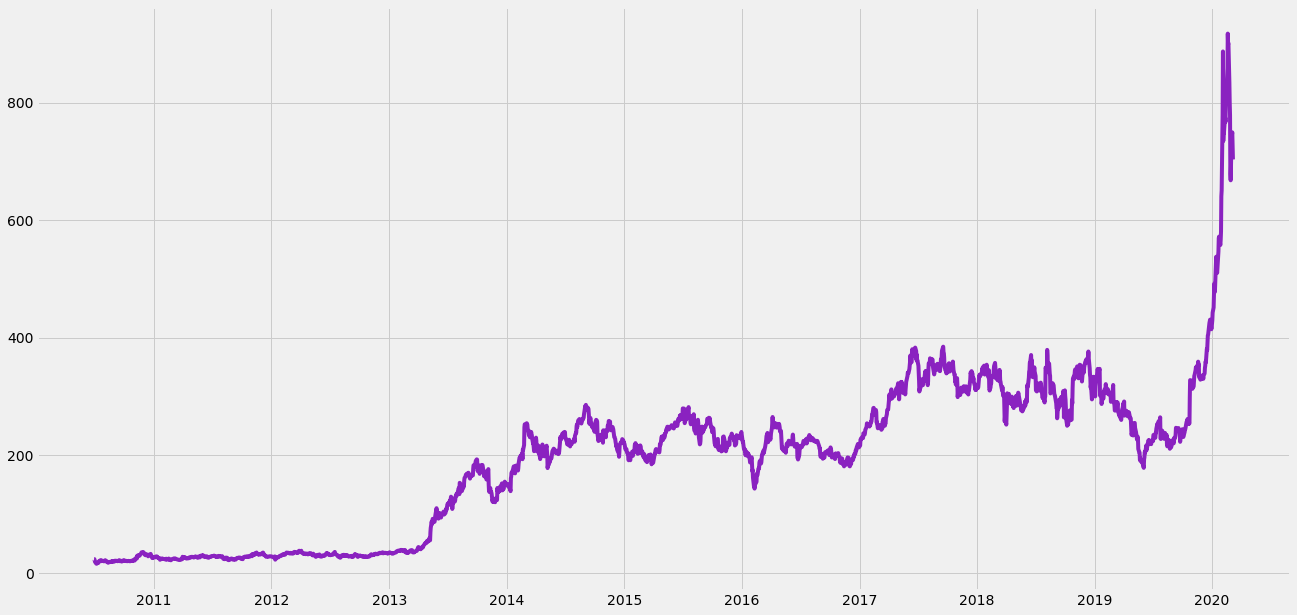

In [62]:
plt.figure(figsize=(20,10))
plt.plot(df_TSLA['Adj Close'], c=np.random.rand(3))

## Importing S&P, Dow Jones & NASDAQ daily stock exchange values from 2010 onwards

Hereafter are being imported the evolution of the three main US stock markets : S&P500, NASDAQ and Dow Jones Industrial.

Tesla is quoted on NASDAQ, which should be our reference stock market to check whether the general evolution of NASDAQ has any influence on Tesla stock as a whole.

S&P500 & DJI have very similar evolution to NASDAQ, therefore keeping all 3 indicators would not be quite useful, since there would be a very strong correlation between those 3.
Therefore, only NASDAQ evolution will be kept for this study.

#### S&P500

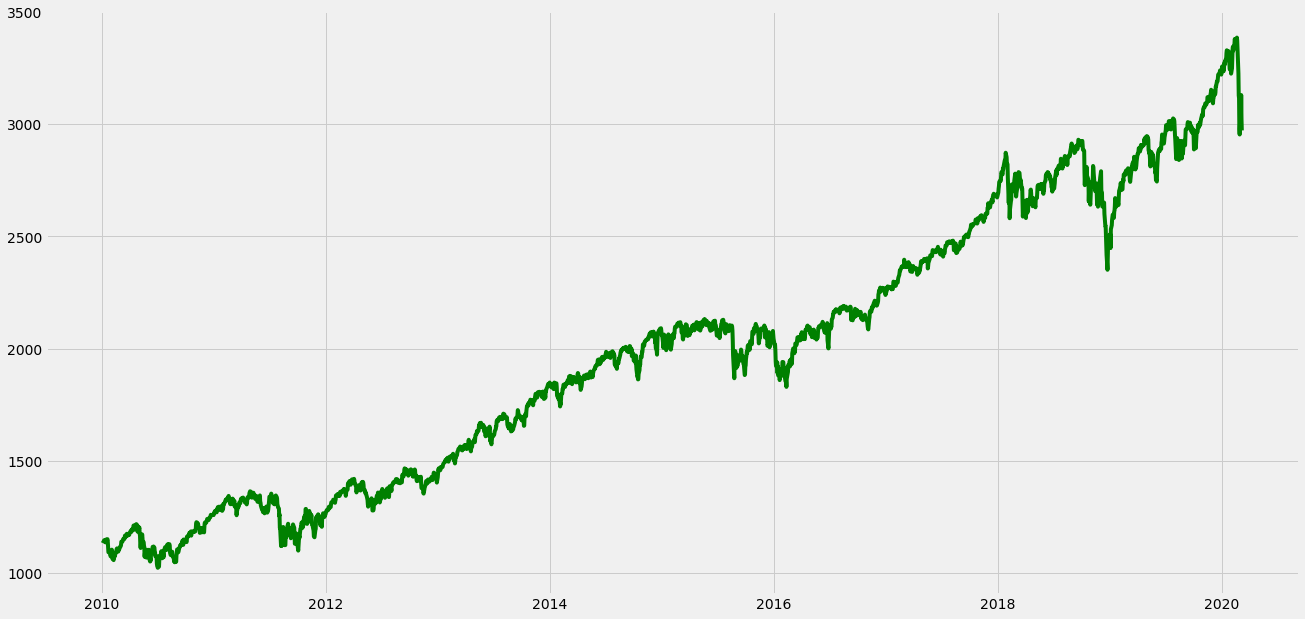

In [58]:
df_SP500 = get_stock_rates('^GSPC')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_SP500['Adj Close'], c=np.random.choice(color_list))


#### NASDAQ

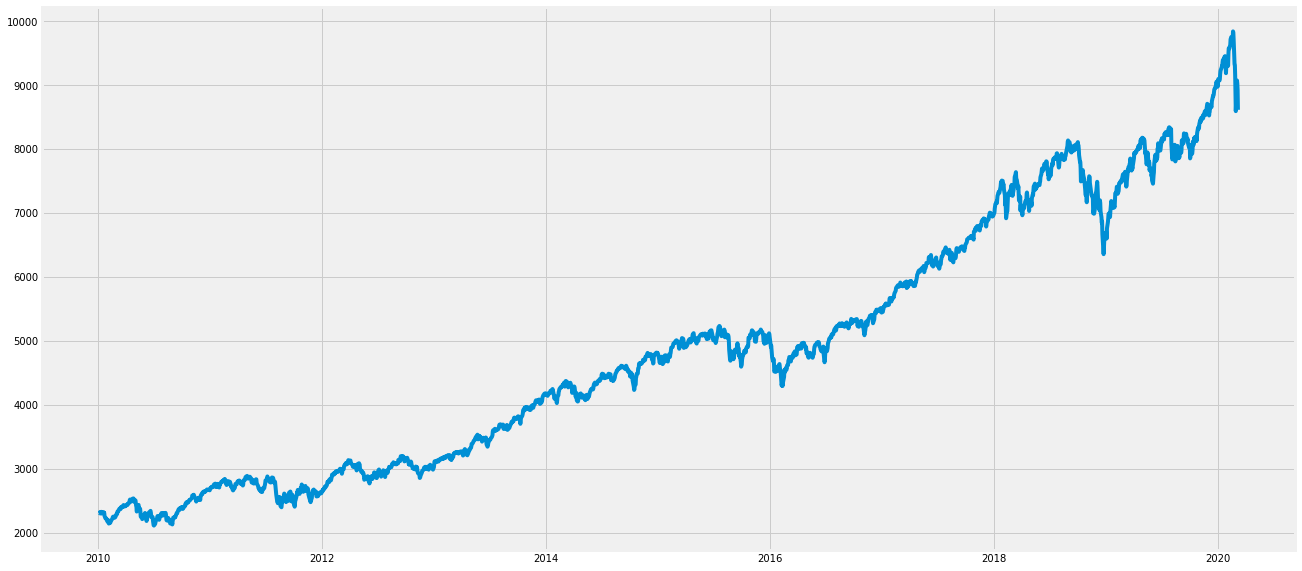

In [9]:
df_NASDAQ = get_stock_rates('^IXIC')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_NASDAQ['High'])


#### Dow Jones Industrial

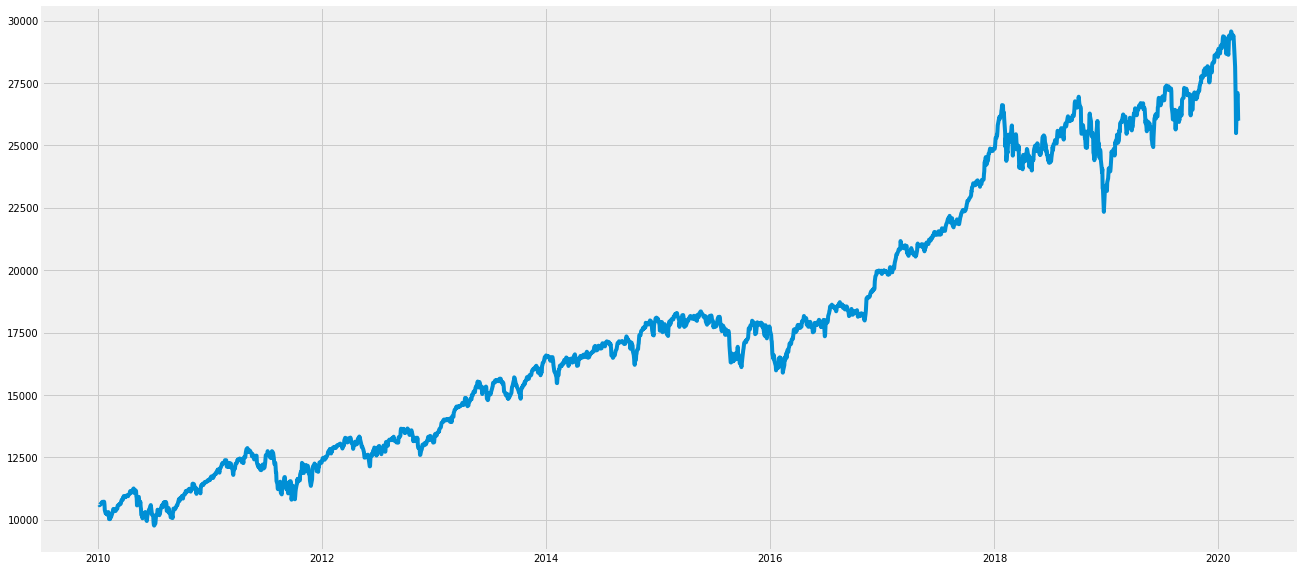

In [10]:
df_DowJones = get_stock_rates('^DJI')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_DowJones['High'])


## Importing Car competitors daily stock exchange values from 2010 onwards

To evaluate the evolution of Tesla's stock prices, it will be compared to other car companies in order to be able to measure the performance of Tesla as a car making company versus other international competitors

For this study, we have chosen 5 major car companies, both US based & international :
- **General Motors** - main US car company
- **Ford** - historical US car company
- **Toyota** - #1 car making company - main international car company specialised historically in electric hybrid cars
- **VW VolskWagen Group** - 2nd car making company
- **Nissan** - important car maker historically important in the electric car market

#### General Motors

In [11]:
df_gm = get_stock_rates('GM')

df_gm.head()

,High,Low,Open,Close,Volume,Adj Close,avg_price
Date,,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,26.155519,34.940001
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,26.209070,33.805000
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,26.071363,34.145000
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,25.436413,33.590000
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,25.612371,33.510000


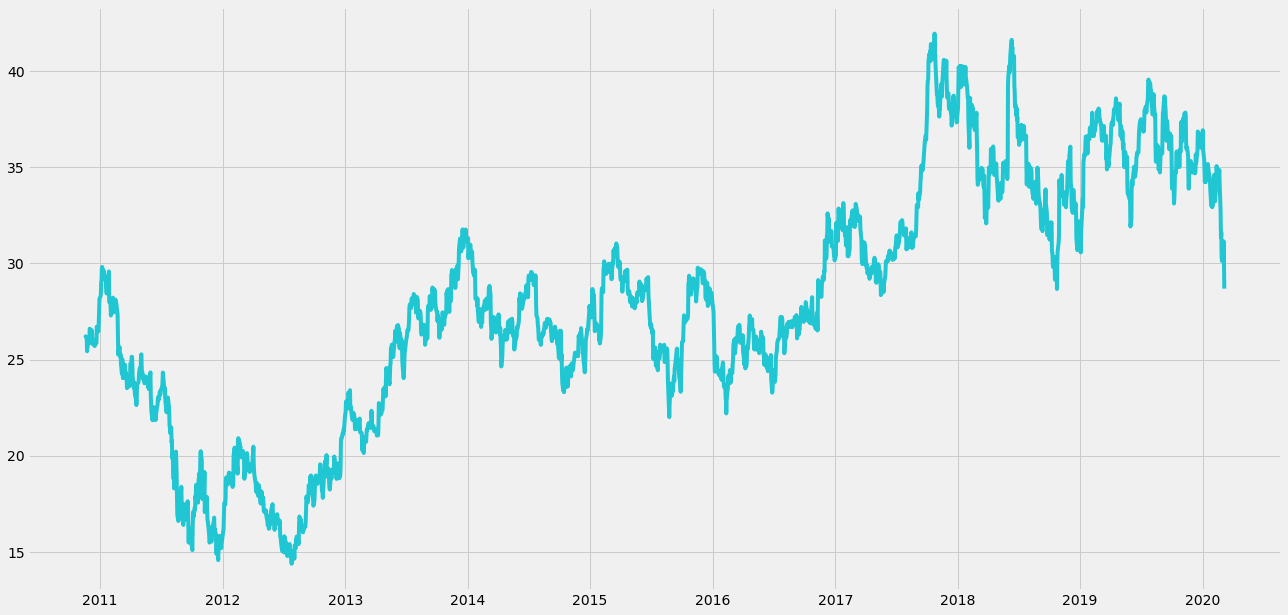

In [63]:
plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_gm['Adj Close'], c=np.random.rand(3))

#### Ford

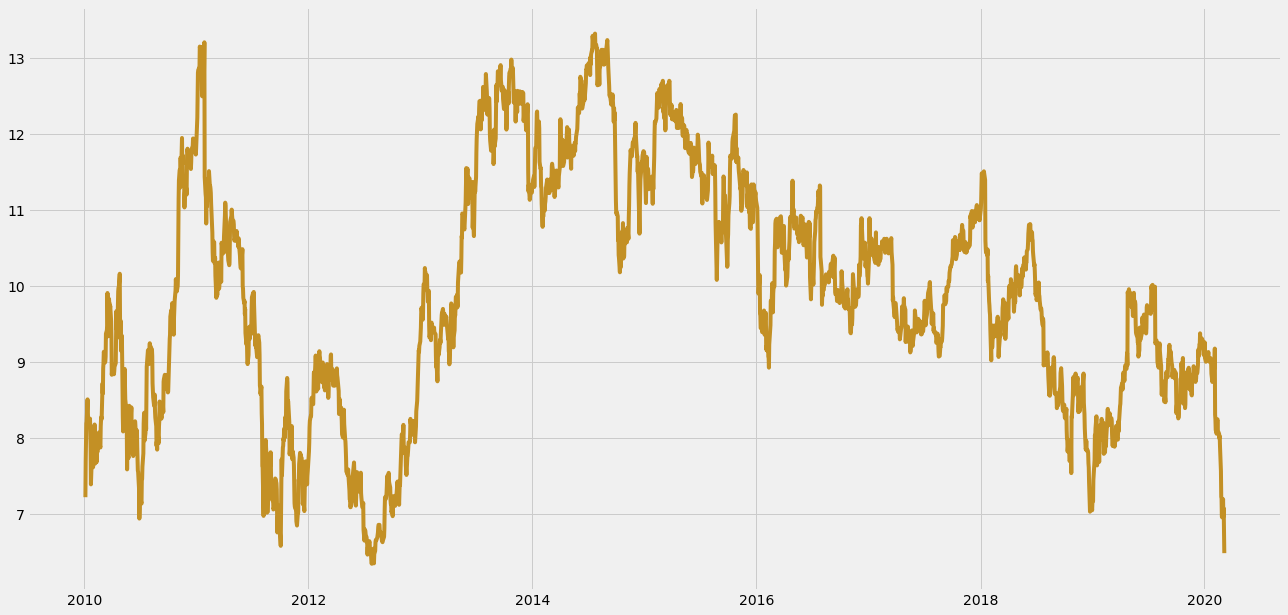

In [64]:
df_ford = get_stock_rates('F')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_ford['Adj Close'], c=np.random.rand(3))


#### Toyota

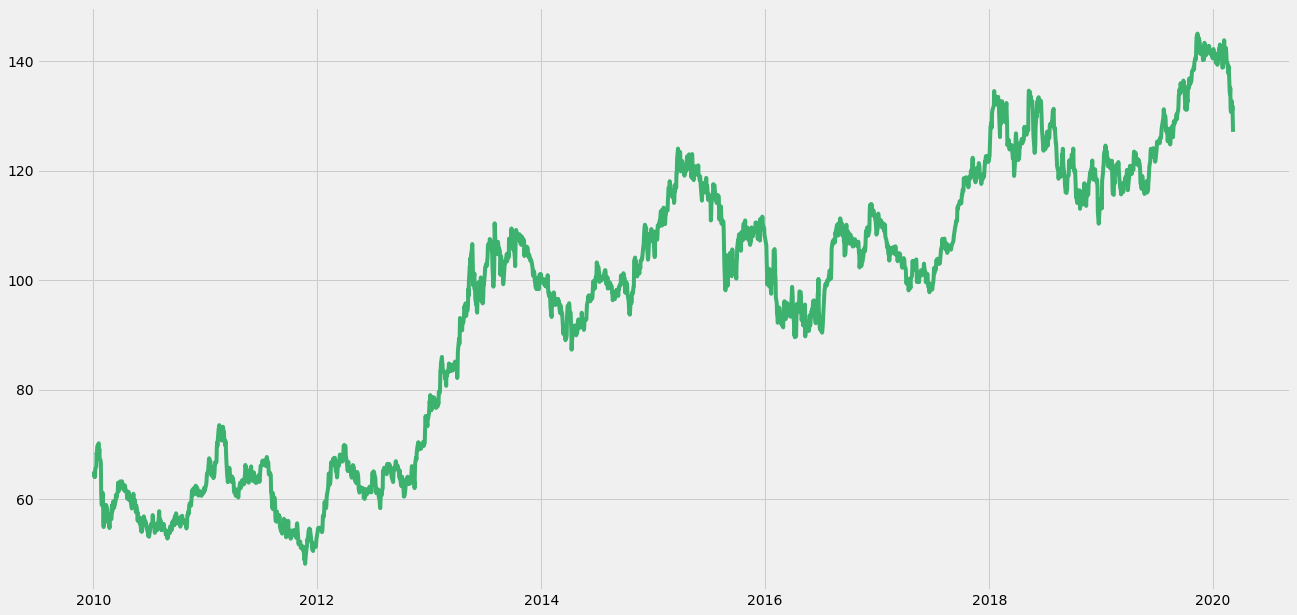

In [65]:
df_toyota = get_stock_rates('TM')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_toyota['Adj Close'], c=np.random.rand(3))


#### Nissan

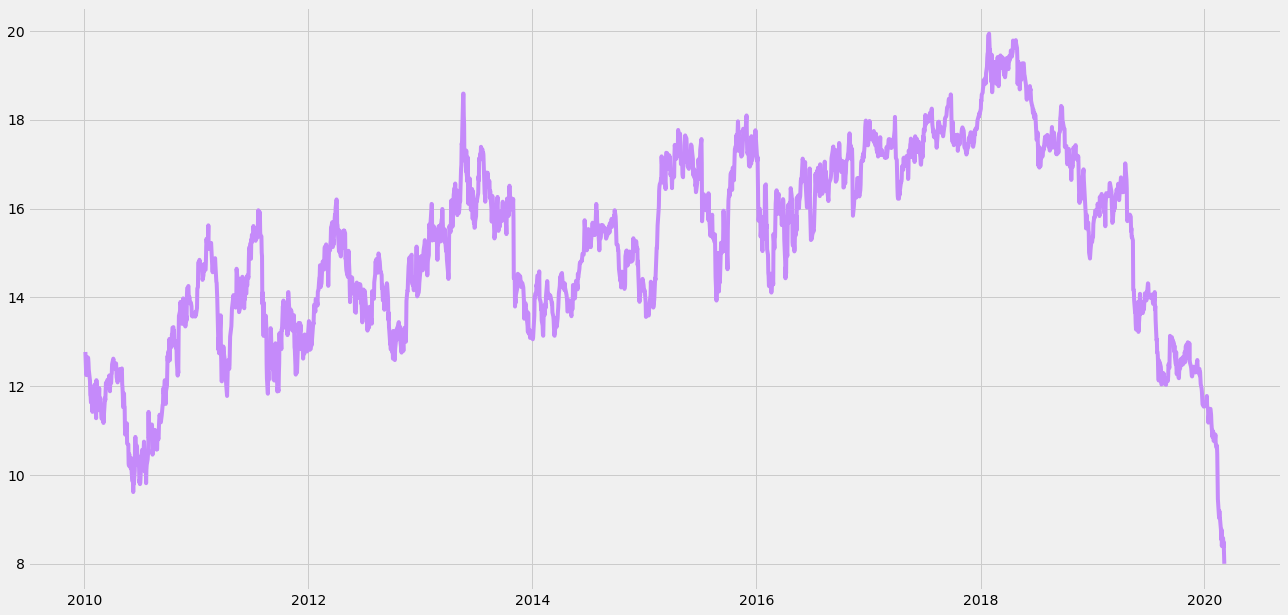

In [66]:
df_nissan = get_stock_rates('NSANY')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_nissan['Adj Close'], c=np.random.rand(3))


#### VW VolksWagen Group

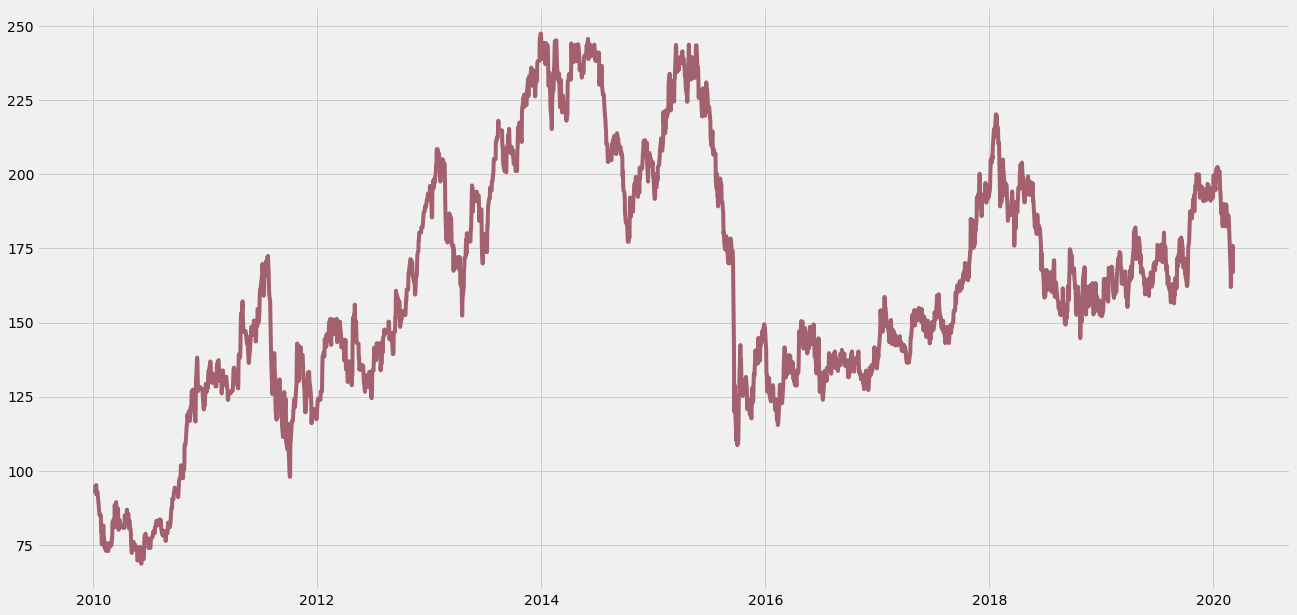

In [67]:
df_VW = get_stock_rates('VLKAF')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_VW['Adj Close'], c=np.random.rand(3))


## XXXX Importing other US Tech companies' daily stock exchange values from 2010 IPO onwards

Tesla is considered a Tech company ; therefore it may be compared to other Tech companies.
Here it will be compared to two famous groups of US Tech companies:
- the GAFAM i.e. Google, Amazon, Facebook, Apple & Microsoft. Over the past decade, those 5 companies have seen their stock values skyrocketed, up to a point where Google, Microsoft, Amazon & Apple regularly set new record on the highest stock value ever reached (the symbolic $1 trillion has been overpassed by all of those companies in the past decade)
- Tesla is considered part of the so-called NUTA (Netflix, Uber, Tesla, AirBnB), an acronym grouping those "new" Tech companies. Therefore, the values of the public companies in that group will also be compared to Tesla (AirBnB is still a "Unicorn", a high-value private company waiting to do its IPO) 

### XXX-1. Importing GAFAM stocks

Aside from car competitors, Tesla being considered an important Tech company, it is relevant to compare its evolution to other tech companies' stocks

#### Google

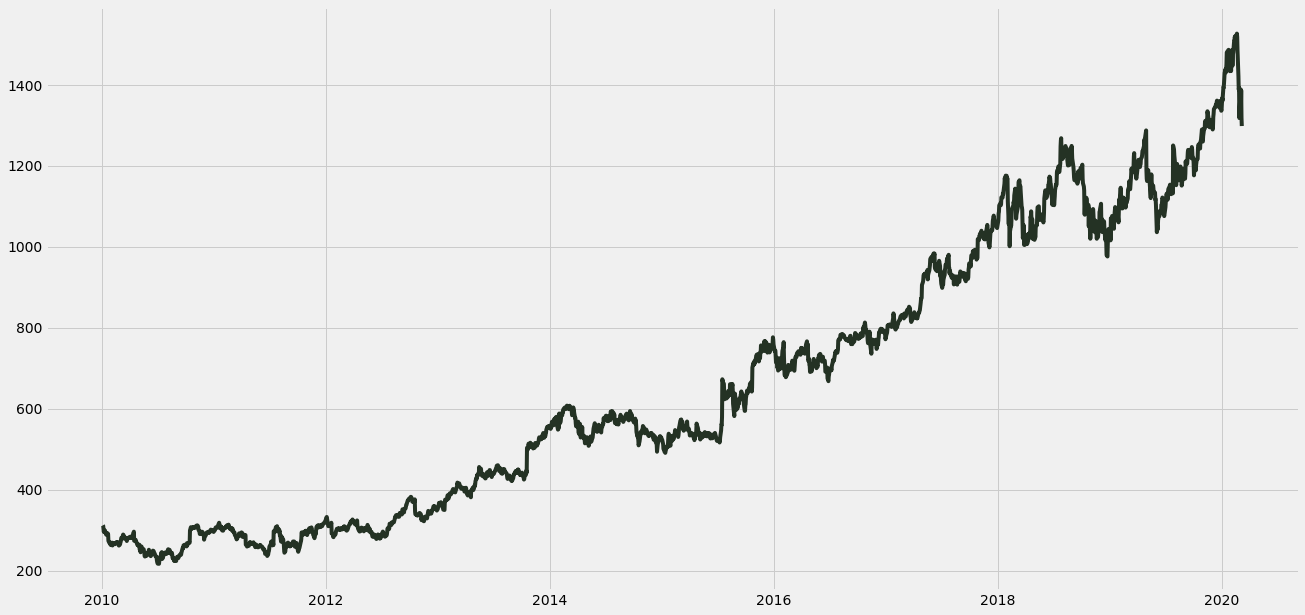

In [68]:
df_google = get_stock_rates('GOOG')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_google['Adj Close'], c=np.random.rand(3))

#### Apple

In [18]:
df_Apple = get_stock_rates('AAPL')
df_Apple.head()

,High,Low,Open,Close,Volume,Adj Close,avg_price
Date,,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483,30.491428
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366,30.631428
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509,30.427143
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146,30.075001
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753,30.075715


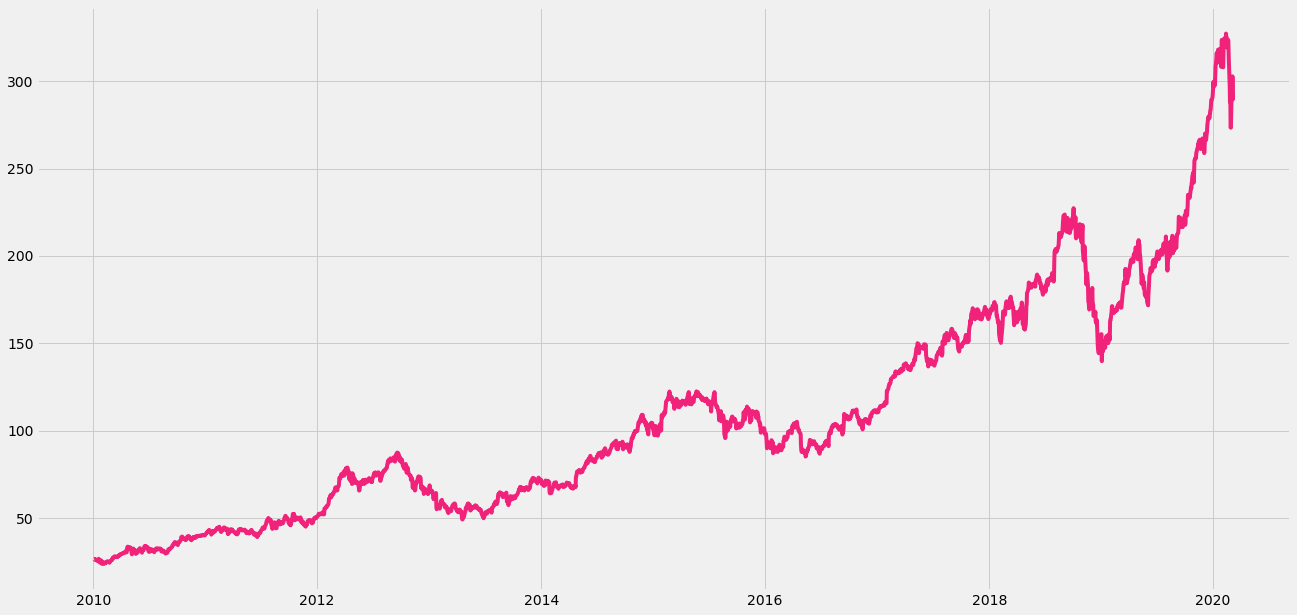

In [69]:
plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_Apple['Adj Close'], c=np.random.rand(3))

#### Facebook

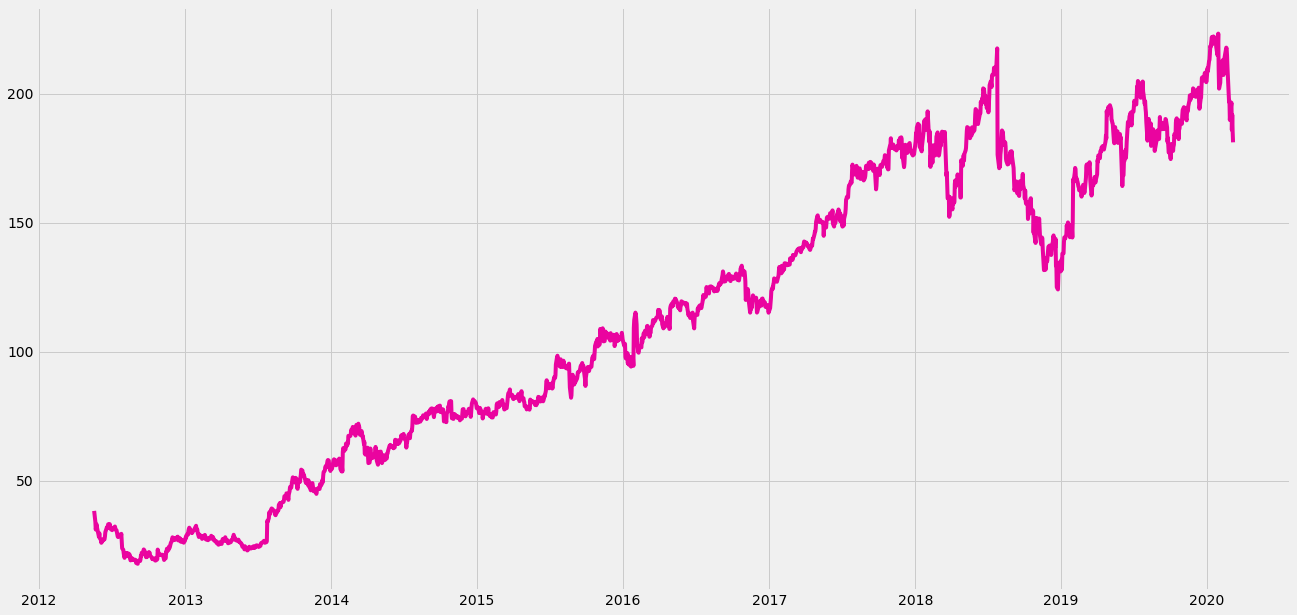

In [74]:
df_fb = get_stock_rates('FB')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_fb['Adj Close'], c=np.random.rand(3))

#### Amazon

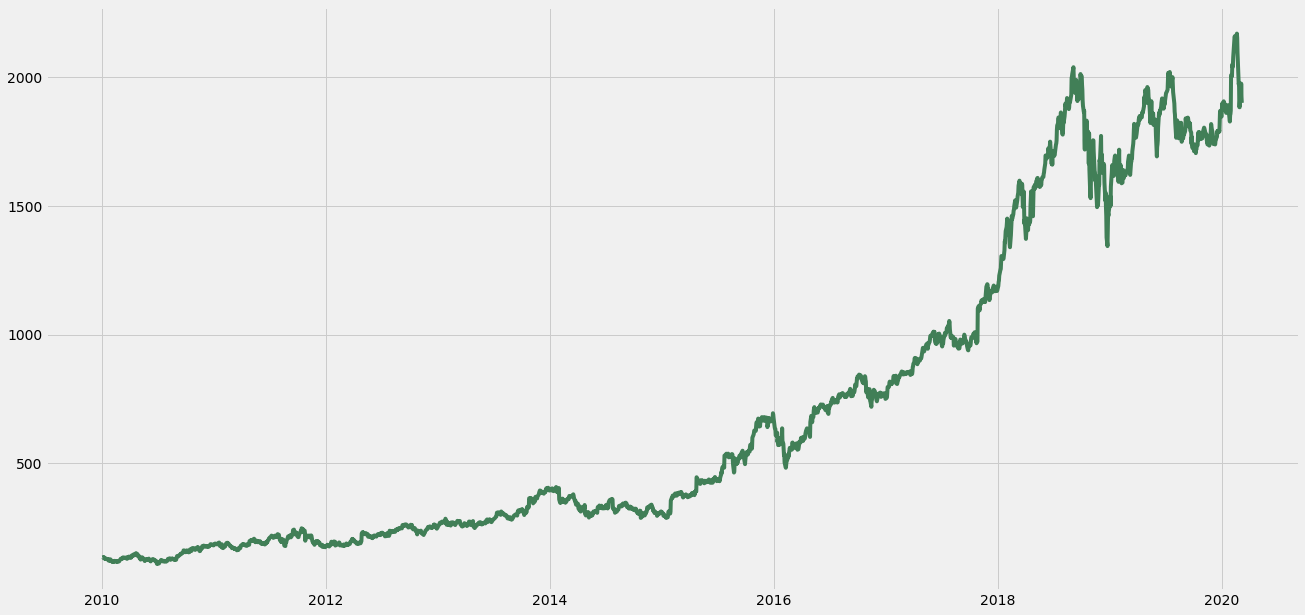

In [71]:
df_amazon = get_stock_rates('AMZN')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_amazon['Adj Close'], c=np.random.rand(3))

#### Microsoft

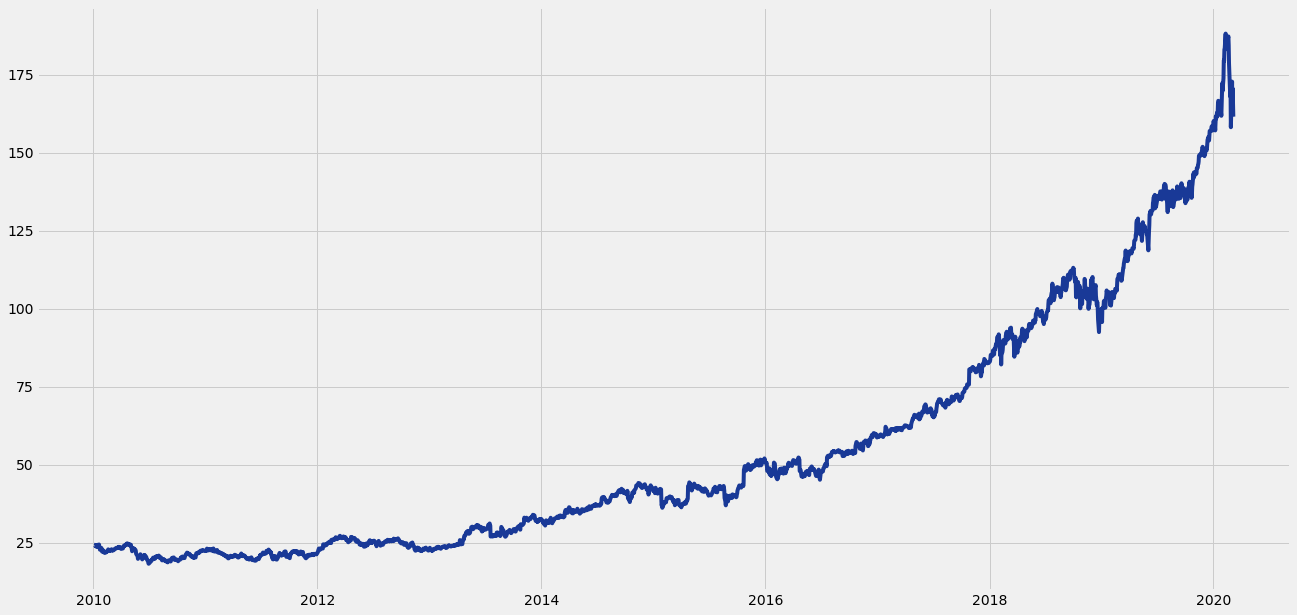

In [72]:
df_msft = get_stock_rates('MSFT')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_msft['Adj Close'], c=np.random.rand(3))

### XXX-1. Importing NUTA stocks

#### Netflix

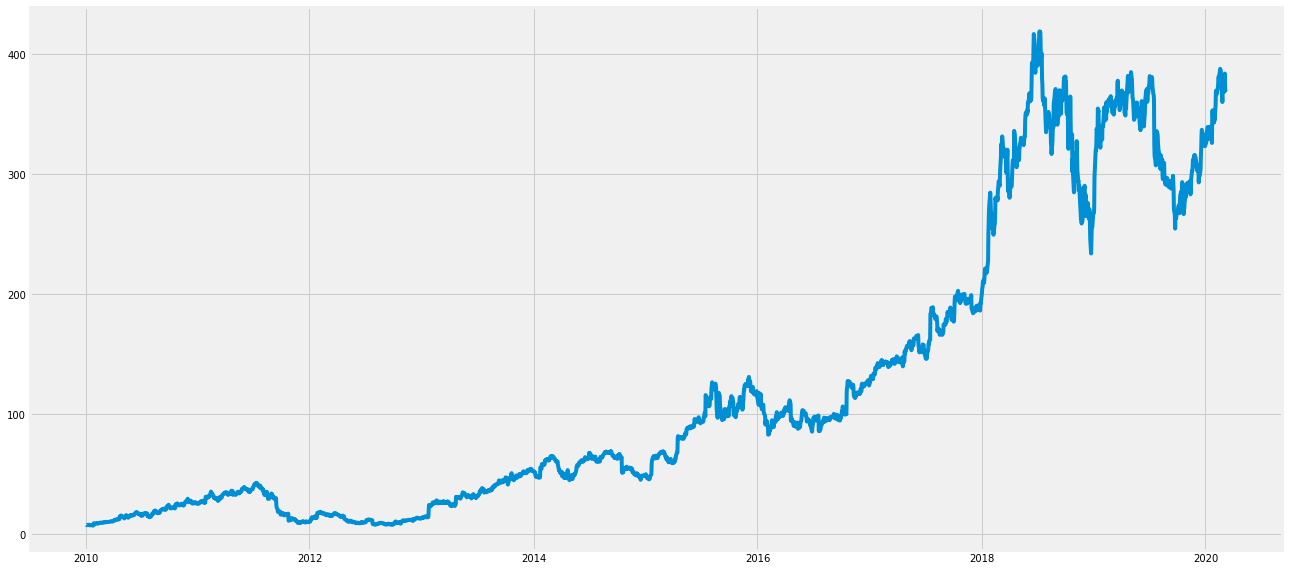

In [24]:
df_netflix = get_stock_rates('NFLX')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_netflix['Adj Close'])

#### Uber

Uber made its IPO in May 2019, therefore it has low backdata when compared to other Tech companies

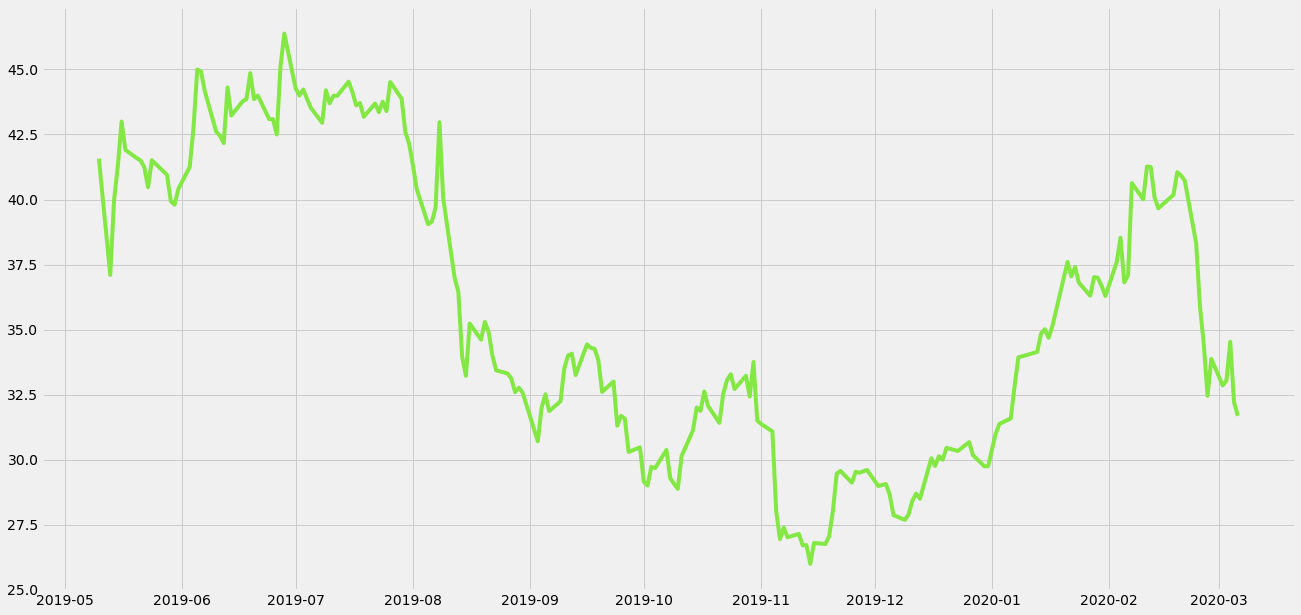

In [75]:
df_uber = get_stock_rates('UBER')

plt.fig = plt.figure(figsize=(20,10))
plt.plot(df_uber['Adj Close'], c=np.random.rand(3))

## XXXX Merging all Tech Values into One Tech value Dataframe

In order to compare stock evolution of the aforementioned various Tech companies, all of the imported values will be merged into one dataframe, in order to measure stock correalation and their eventual impact on Tesla's stock evolution.

### XXX-1. Merging All Car Companies into One Car Maker Dataframe

In [ ]:
df_car_companies_merged = pd.concat([df_TSLA['Adj Close'] , df_gm['Adj Close'] , df_ford['Adj Close'], df_toyota['Adj Close'] , df_nissan['Adj Close'] , df_VW['Adj Close']], axis=1)

df_car_companies_merged.columns = ['Tesla_ADJ_Close', 'GM_ADJ_Close', 'Ford_ADJ_Close', 'Toyota_ADJ_Close', 'Nissan_ADJ_Close', 'VW_ADJ_Close']

In [ ]:
df_car_companies_merged.to_csv('df_car_companies_merged.csv')

In [ ]:
scatter_matrix(df_car_companies_merged, figsize=(30,20), alpha=0.5, hist_kwds={'bins':70})

In [ ]:
scatter_matrix(df_car_companies_merged, figsize=(30,20), alpha=0.5, hist_kwds={'bins':50})

### XXX-2. Merging All Tech Companies into One Tech Dataframe

In [33]:
df_Tech_merged = pd.concat([df_TSLA['Adj Close'] , df_google['Adj Close'] , df_Apple['Adj Close'], df_fb['Adj Close'] , df_amazon['Adj Close'] , df_msft['Adj Close'], df_netflix['Adj Close'], df_uber['Adj Close']], axis=1)

df_Tech_merged.columns = ['Tesla_ADJ_Close', 'Google_ADJ_Close', 'Apple_ADJ_Close', 'FB_ADJ_Close', 'Amazon_ADJ_Close', 'Microsoft_ADJ_Close', 'Netflix_ADJ_Close', 'UBER_ADJ_Close']

In [34]:
df_Tech_merged.to_csv('df_Tech_merged.csv')

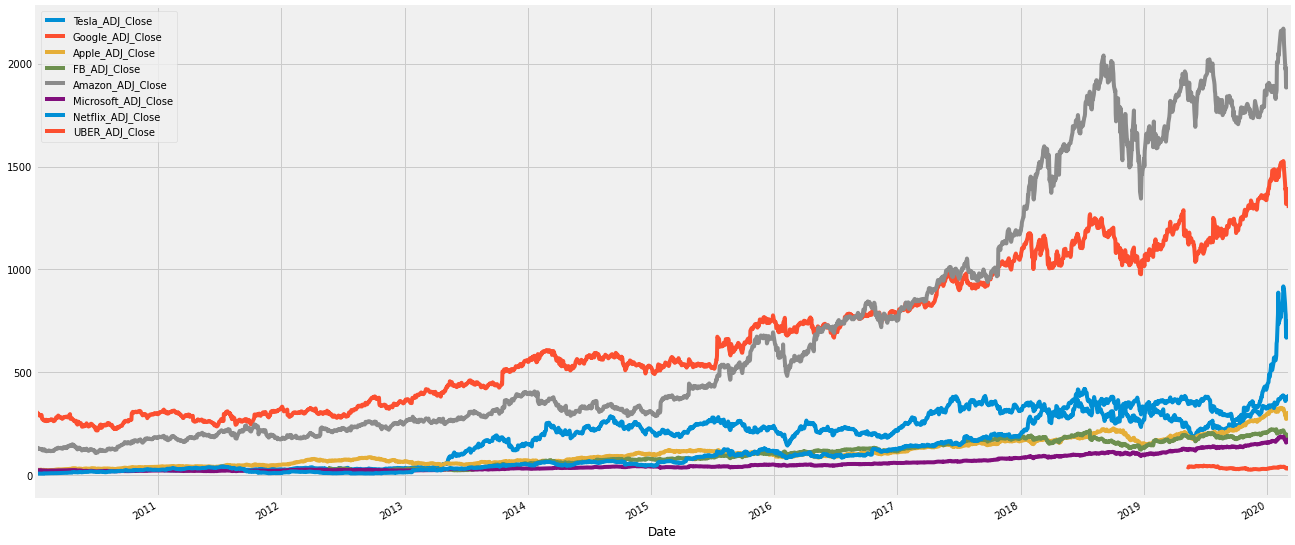

In [36]:
df_Tech_merged.plot(figsize=(20,10))

In [37]:
corr_tech = df_Tech_merged.corr()

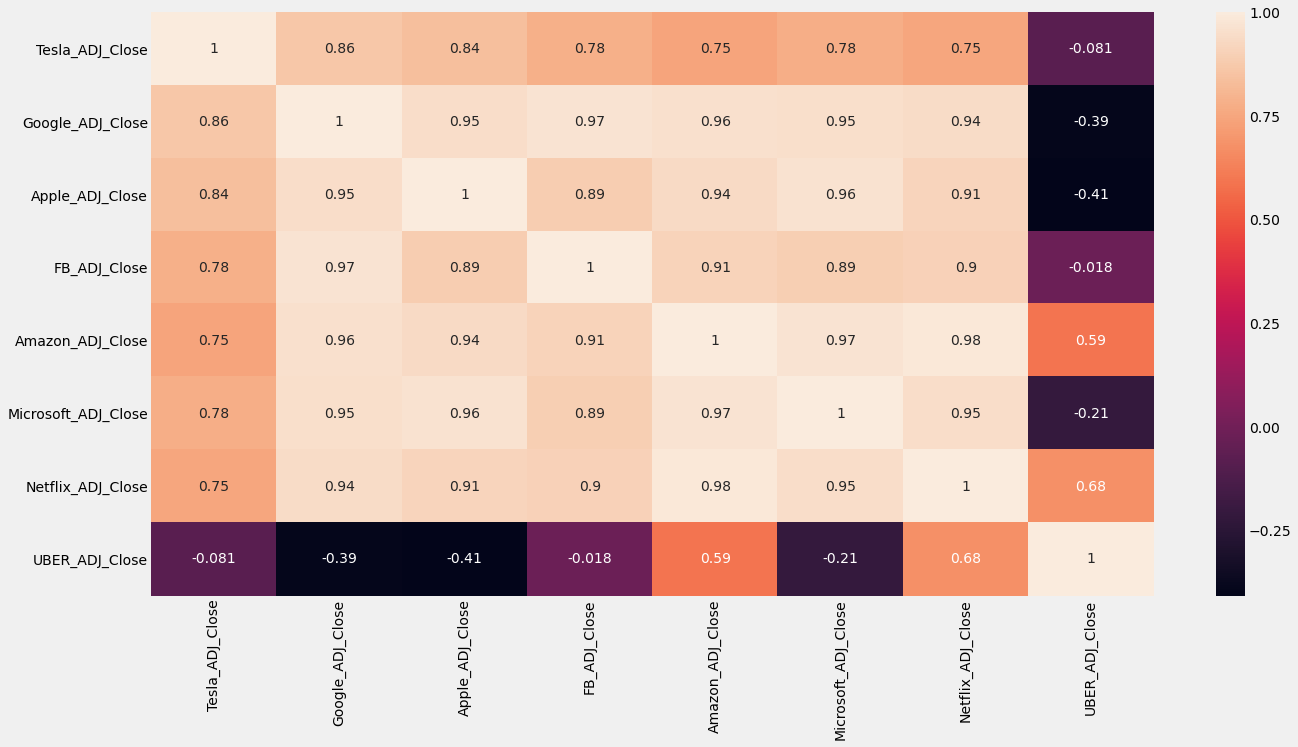

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_tech, annot=True)

### XXX-1. Importing GAFAM stocks

### XXX-1. Comparison of Car Stock Values stocks

This section will compare various value of the previously imported value to measure how Tesla stocks evovle in comparison to other value

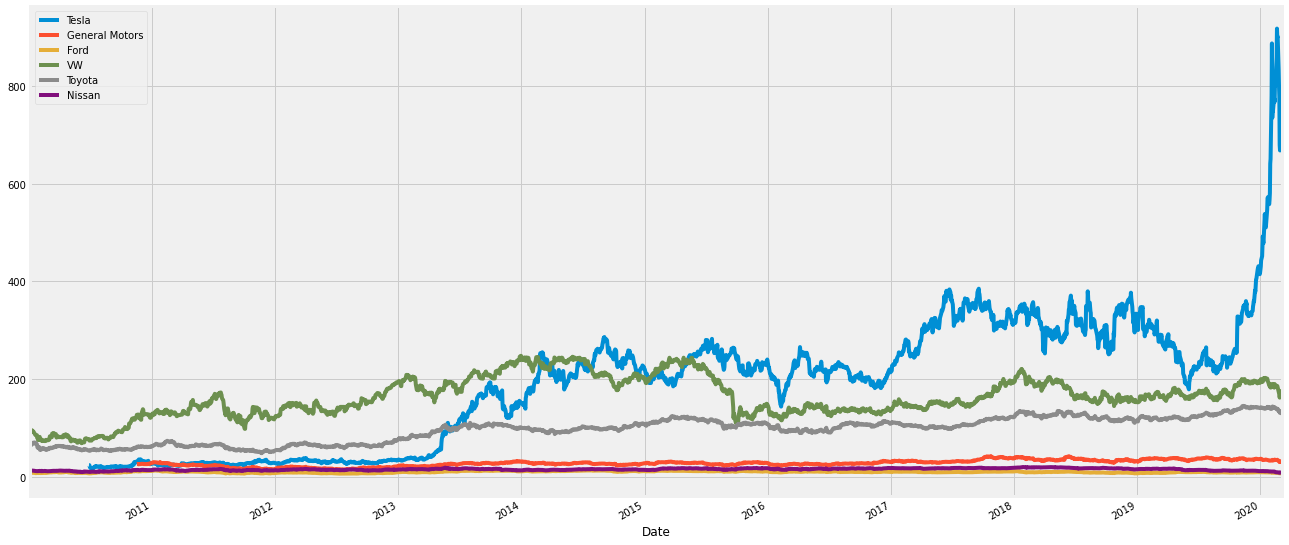

In [29]:
plt.fig = plt.figure(figsize=(20,10))
df_TSLA['Adj Close'].plot(label='Tesla')
df_gm['Adj Close'].plot(label='General Motors')
df_ford['Adj Close'].plot(label='Ford')
df_VW['Adj Close'].plot(label='VW')
df_toyota['Adj Close'].plot(label='Toyota')
df_nissan['Adj Close'].plot(label='Nissan')
plt.legend()
plt.show()

Tesla has a stock evolution way higher than its competition, which makes its stock reading hard

### XXX-2. Importing GAFAM stocks

In [ ]:
df_Tech_merged = pd.concat([df_TSLA['Adj Close'] , df_google['Adj Close'] , df_Apple['Adj Close'], df_fb['Adj Close'] , df_amazon['Adj Close'] , df_msft['Adj Close'], df_netflix['Adj Close'], df_uber['Adj Close']], axis=1)

df_Tech_merged.columns = ['Tesla_ADJ_Close', 'Google_ADJ_Close', 'Apple_ADJ_Close', 'FB_ADJ_Close', 'Amazon_ADJ_Close', 'Microsoft_ADJ_Close', 'Netflix_ADJ_Close', 'UBER_ADJ_Close']

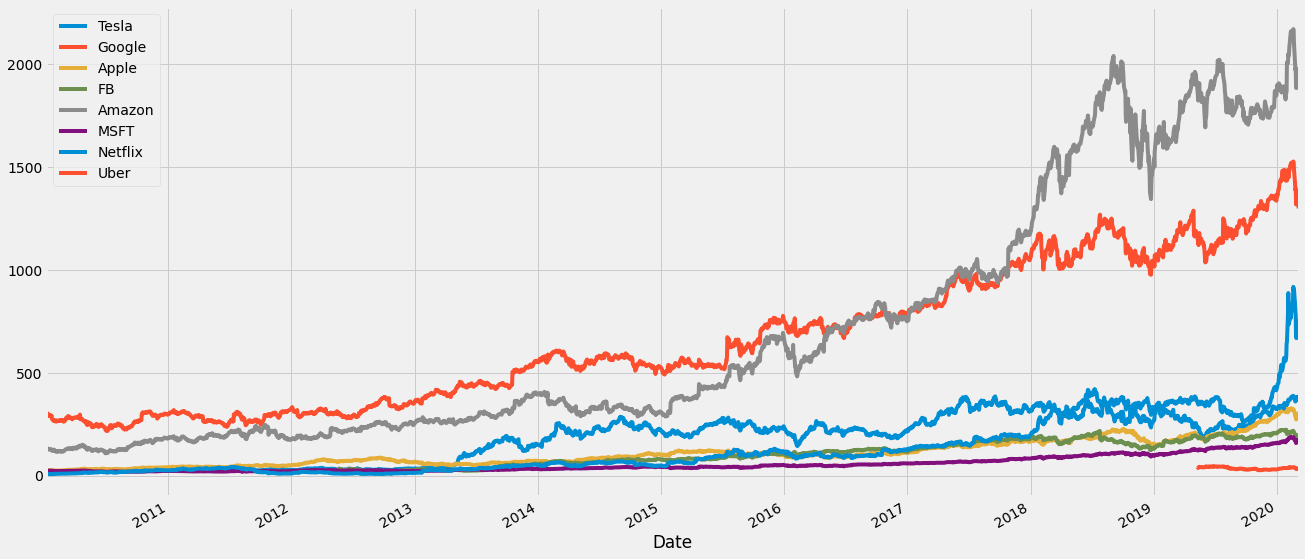

In [44]:
plt.fig = plt.figure(figsize=(20,10))
df_TSLA['Adj Close'].plot(label='Tesla')
df_google['Adj Close'].plot(label='Google')
df_Apple['Adj Close'].plot(label='Apple')
df_fb['Adj Close'].plot(label='FB')
df_amazon['Adj Close'].plot(label='Amazon')
df_msft['Adj Close'].plot(label='MSFT')
df_netflix['Adj Close'].plot(label='Netflix')
df_uber['Adj Close'].plot(label='Uber')
plt.legend()
plt.show()